## Exploration

In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

# Load in the time series
candy = pd.read_csv('candy_production.csv',
        index_col='date',
            parse_dates=True)
            
# candy.head(10)
# Plot and show the time series on axis ax

fig,ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

<Figure size 640x480 with 1 Axes>

## Train-test splits

In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The candy production data set has been loaded in for you as candy already and pyplot has been loaded in as plt

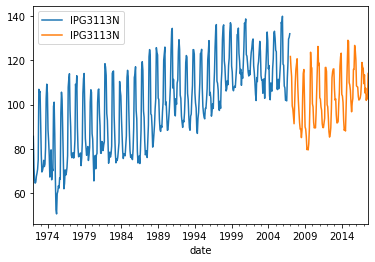

In [2]:
# Split the data into a train and test set
candy_train = candy[:"2006"]
candy_test = candy["2007":]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

# candy.head()

## Augmented Dicky-Fuller

In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

In [23]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
earthquake = pd.read_csv('earthquakes.csv',
        index_col='date',
            parse_dates=True)

result = adfuller(earthquake["earthquakes_per_year"])

# Print test statistic
# print(result)
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


## Taking the difference

In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

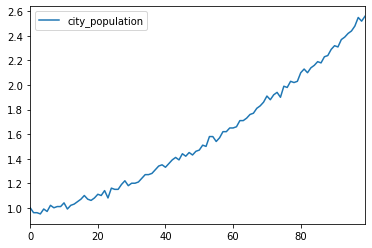

ADF Statistic: 5.155366442208547
p-value: 1.0


In [7]:
# Run the ADF test on the time series
import numpy as np

city = pd.DataFrame([1.0, 0.96, 0.96, 0.95, 0.99, 0.97, 1.02, 1.0, 1.01, 1.01, 1.04, 0.99, 1.02, 1.03, 1.05, 1.07, 1.1, 1.07, 1.06, 1.08, 1.11, 1.1, 1.14, 1.08, 1.16, 1.15, 1.15, 1.19, 1.22, 1.18, 1.2, 1.2, 1.21, 1.24, 1.27, 1.27, 1.28, 1.31, 1.34, 1.35, 1.33, 1.36, 1.39, 1.41, 1.39, 1.44, 1.42, 1.45, 1.43, 1.46, 1.47, 1.51, 1.5, 1.58, 1.58, 1.54, 1.57, 1.62, 1.62, 1.65, 1.65, 1.66, 1.71, 1.71, 1.73, 1.76, 1.77, 1.81, 1.83, 1.86, 1.91, 1.88, 1.92, 1.94, 1.9, 1.99, 1.98, 2.03, 2.02, 2.03, 2.1, 2.13, 2.1, 2.14, 2.16, 2.19, 2.18, 2.23, 2.24, 2.29, 2.32, 2.31, 2.37, 2.39, 2.42, 2.44, 2.48, 2.55, 2.52, 2.56]
, columns = ['city_population'])

# city = pd.read_csv('city.csv',
#        index_col='date',
#           parse_dates=True)

# city = city.astype(float)
# pd.to_numeric(city)
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# city.dtypes

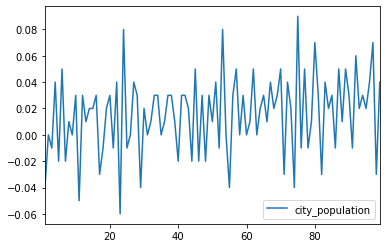

ADF Statistic: -0.8644375132664974
p-value: 0.7994580176641001


In [8]:
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

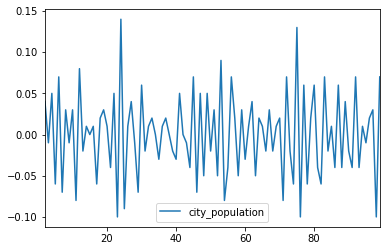

ADF Statistic: -5.811473371140932
p-value: 4.391157412533746e-07


In [9]:
# Calculate the second difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

## Other tranforms

Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:
log_return(yt)=log(ytyt−1)
The Amazon stock time series has already been loaded for you as amazon. You can calculate the log-return of this DataFrame by substituting:

yt→ amazon

yt−1→ amazon.shift(1)

log()→ np.log()

In this exercise you will compare the log-return transform and the first order difference of the Amazon stock time series to find which is better for making the time series stationary.



In [10]:
amazon = pd.read_csv('amazon_close.csv',
                     parse_dates = ['date'],
                     index_col = 'date')
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


In [11]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff().dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log((amazon/amazon.shift(1)).dropna())

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.203579488811216, 2.33127172548757e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)
(-34.915748536059674, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


## Generating ARMA data

In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.

Remember:

The first value of each list of AR and MA coefficients must be 1 for the lag-0 term.
For any model ARMA(p,q), the list ar_coefs will have p+1 values and the ma_coefs will have q+1 values.

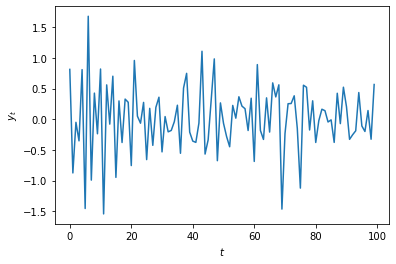

In [12]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1,]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

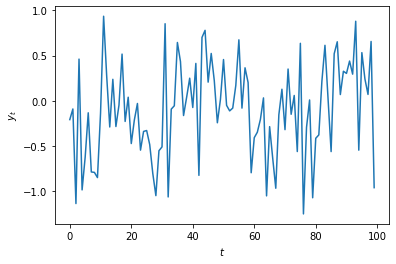

In [13]:
# Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively.

from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1,]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

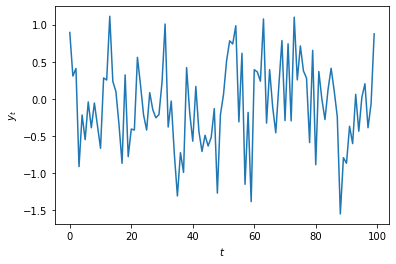

In [14]:
# Set the coefficients for a model with form yt=−0.2yt−1+0.3ϵt−1+0.4ϵt−2+ϵt.

# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

## Fitting Prelude

Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

In [15]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1,1))

# Fit the model
results = model.fit()
